In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
34,17.0,6,250.0,100,3329,15.5,48
119,19.0,4,121.0,112,2868,15.5,46
124,20.0,6,198.0,95,3102,16.5,45
155,15.0,8,350.0,145,4440,14.0,44
235,30.5,4,98.0,63,2051,17.0,42


### Linear regression with one feature - horsepower

In [3]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
x_train.sample(5)

,horsepower
166,83
344,62
28,193
132,110
151,105


In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [6]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6206040827179776


In [7]:
y_pred = linear_model.predict(x_test)

In [8]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5537241922179895


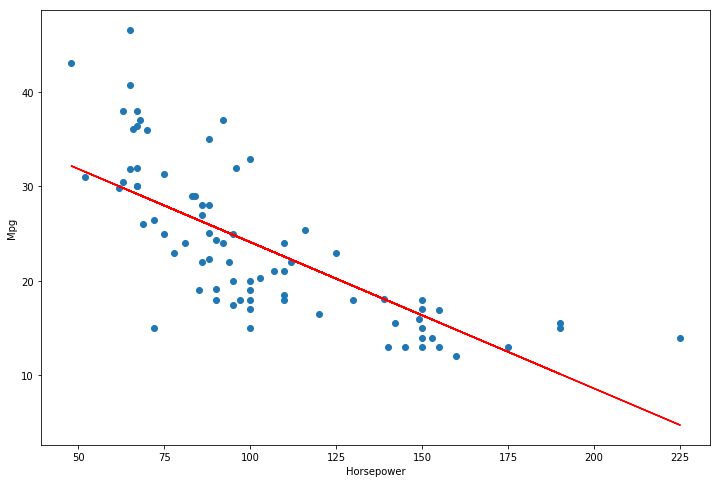

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

### Linear regression with one feature - age

In [10]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3723503843168058
Testing score:  0.1934271344126337


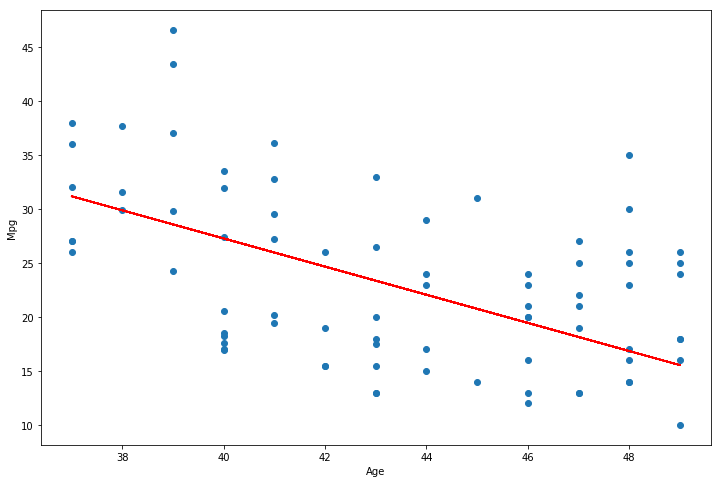

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

### Linear regression with multiple features

In [12]:
## NOTES for recording
## While recording start with uncommented code then change the next line to add 2 more features as shown here
## X = automobile[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]

X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [14]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.718701964325382


In [15]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.038756
displacement   -0.009532
weight         -0.004883
dtype: float64


In [16]:
y_pred = linear_model.predict(x_test)

In [17]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6522350612695293


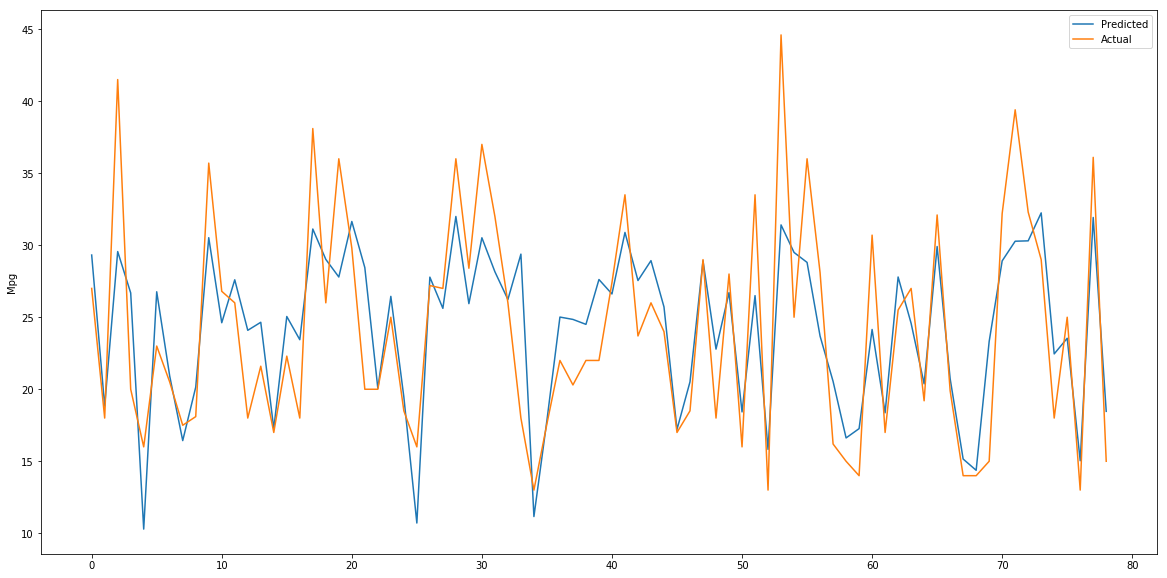

In [18]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()